# **Series, columns & basic plots with Pandas**
---
* A `Series` is a data structure that comes with the `pandas`library.
* `Series` are especially useful in selecting / narrowing down a `DataFrame` down to a single `column` at a time, in either of two ways: `df.age` or `df["age"]`
* A `Series` is a one-dimensional labeled *(indexed)* array capable of holding data of any type (integer, string, float, python objects, etc.)

In [4]:
# Parsing our Datasets into DataFrames:
import pandas as pd
houses = pd.read_csv("/content/kc_house_data.csv")
titanic = pd.read_csv("/content/titanic.csv")
netflix = pd.read_csv("/content/netflix_titles.csv", delimiter="|", index_col=0)
bestsellers = pd.read_csv("/content/bestsellers.csv")

In [5]:
# Peek into the titanic DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


### Selecting a single column from the `titanic` DataFrame

In [6]:
# Selecting the 'name' column from the titanic DataFrame
titanic["name"] # same as calling titanic.name

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [ ]:
# Check out, the type returned from the above line of code is a pandas Series
type(titanic["name"])

Labels (index) in a `series` can either be numeric or otherwise (such as text)



In [8]:
# The code below returns a Series with 0 - 1308 as the labels or index(es), and values as male or female
titanic["sex"]

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

In [9]:
'''Whereas the code below returns a Series with id, price, floors, e.t.c as the labels or index(es),
      and values as information to the right
'''
houses.mean(numeric_only=True)
# Recall, the df.mean() method returns a Series

id               4.580302e+09
price            5.400881e+05
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
dtype: float64

### Basic Baaaaasic `Series` methods
A lot of the `DataFrame` methods & properties also exist on the `Series` data structure

In [10]:
# Sum
houses["price"].sum()

11672925008.0

In [11]:
# Max
houses["bedrooms"].max()

33

In [12]:
# Shape
houses["price"].shape

(21613,)

In [13]:
# Values
titanic["name"].values # Returns the underlying array containing the names

array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine', ..., 'Zakarian, Mr. Mapriededer',
       'Zakarian, Mr. Ortin', 'Zimmerman, Mr. Leo'], dtype=object)

In [15]:
# Index
titanic["name"].index # The label (index) for the series is a RangeIndex starting at 0 and eding at 1309

RangeIndex(start=0, stop=1309, step=1)

In [16]:
houses.min(numeric_only=True).index # The label (index) for the series is a list of values

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Important `Series` methods

In [17]:
# Head
titanic["age"].head(10) # Returns a Series with the first 10 values

0        29
1    0.9167
2         2
3        30
4        25
5        48
6        63
7        39
8        53
9        71
Name: age, dtype: object

In [18]:
# Tail
netflix["title"].tail(10) # Returns a Series with last 10 values

5420                                           Dangal
5421                                   Young & Hungry
5422               Pac-Man and the Ghostly Adventures
5423            Puss in Book: Trapped in an Epic Tale
5424    Rory Scovel Tries Stand-Up for the First Time
5425                                         Aquarius
5426                                     Counterpunch
5427                                  What the Health
5428                                    World of Winx
5429                                   Kanavu Variyam
Name: title, dtype: object

In [19]:
# Describe
houses["price"].describe() # Returns non-numeric stats on a numeric column

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [20]:
netflix["rating"].describe() # Returns non-numeric stats on an Object column

count      5430
unique       11
top       TV-MA
freq       2256
Name: rating, dtype: object

### `Series.unique()` & `Series.nunique()`
These methods can only be applied on a `Series`, and NOT a `DataFrame`

* `Series.unique()` - Returns a unique value of `Series` Objects
* `Series.nunique()` - Return number (int) of unique elements in the object. Excludes NA values by default.

In [21]:
# What is the count of no. of bedrooms in the houses DataFrame?
#houses['bedrooms'].nunique() # df.nunique(dropna=True) is there by default, so that Nan values are excluded
print(f"Total Unique Values: {houses['bedrooms'].nunique()}")

# What are the unique values for bedrooms in the houses DataFrame
houses["bedrooms"].unique()

Total Unique Values: 13


array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

### `Series.nlargest()` & `Series.nsmallest()`

* `Series.nlargest()` - Returns a `Series` with the largest `n` elements in `descending` order
* `Series.nsmallest()` - Returns a `Series` with the largest `n` elements in `ascending` order

In [22]:
# 9 largest house prices
houses["price"].nlargest(9) # By default, returns 5 elements in descending order

7252    7700000.0
3914    7062500.0
9254    6885000.0
4411    5570000.0
1448    5350000.0
1315    5300000.0
1164    5110800.0
8092    4668000.0
2626    4500000.0
Name: price, dtype: float64

In [23]:
# 7 cheapest house prices
houses["price"].nsmallest(7) # By default, returns 5 elements in ascending order

1149     75000.0
15293    78000.0
465      80000.0
16198    81000.0
8274     82000.0
2141     82500.0
18468    83000.0
Name: price, dtype: float64

### `Dataframe.nlargest(n,[list of column(s)])` & `DataFrame.nsmallest(n,[list of column(s)])`

* `DataFrame.nlargest()` - Returns the first `n` rows with the `largest` values in columns, in `descending` order. The columns that are not specified are returned as well, but not used for ordering.
* `DataFrame.nsmallest()` - Return the first `n` rows with the `smallest` values in columns, in `ascending` order. The columns that are not specified are returned as well, but not used for ordering.

*Both methods return a* `DataFrame`

In [24]:
# Give me the 10 largest listings in the houses DataFrame ranked by their price?
houses.nlargest(10, ["price"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
# Returns a DataFrame object
type(houses.nlargest(10, ["price"]))

In [26]:
# Give me the 10 largest listings in the houses DataFrame ranked by their bedrooms & bathrooms
houses.nlargest(10, ["bedrooms", "bathrooms"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
4096,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,...,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
6079,9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,...,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
16844,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
4235,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,...,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450


In [27]:
# Give me the 10 smallest listings in the houses DataFrame ranked by sqft_lot
houses.nsmallest(10, ["sqft_lot"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15743,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,0,...,7,2420,0,1900,0,98112,47.6209,-122.302,1200,1170
5826,1773101159,20150107T000000,250000.0,3,2.25,1050,572,2.0,0,0,...,7,740,310,2006,0,98106,47.5549,-122.363,1260,1062
7589,6371000026,20150122T000000,367500.0,2,2.00,1030,600,2.0,0,0,...,8,680,350,2004,0,98116,47.5788,-122.410,1120,1267
3452,2559950110,20150422T000000,1234570.0,2,2.50,2470,609,3.0,0,0,...,11,1910,560,2011,0,98112,47.6182,-122.312,2440,1229
20604,7899800857,20141215T000000,256950.0,2,2.00,1070,635,2.0,0,0,...,9,720,350,2008,0,98106,47.5212,-122.357,1070,928
21552,688000017,20140627T000000,516500.0,1,1.25,1100,638,3.0,0,0,...,9,1100,0,2014,0,98112,47.6228,-122.307,1110,1933
547,7899800860,20150319T000000,259950.0,2,2.00,1070,649,2.0,0,0,...,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
4352,7899800864,20150305T000000,259950.0,2,2.00,1070,649,2.0,0,0,...,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
19662,3362400125,20150303T000000,405000.0,3,2.00,1060,651,3.0,0,0,...,7,1060,0,2007,0,98103,47.6828,-122.345,1440,1501
21519,1702901618,20150407T000000,420000.0,1,2.00,1070,675,2.0,0,0,...,8,880,190,2007,0,98118,47.5574,-122.284,1220,788


### Selecting a multiple columns from a DataFrame
Returns a subset of columns. A `list` of columns has to be passed to the square brackets as such:
*   `df[list]` or
*   `df[["col_a", "col_b", "col_c"]]`

*Returns a* `DataFrame`


In [28]:
'''
* Get a subset of the houses DataFrame containing only:
  price, bedrooms, bathrooms, grade, condition, yr_built, yr_renovated

* Get 10 listings sort by price in ascending order
'''
# Specifying a list of the columns needed:
cols = ['price', 'bedrooms', 'bathrooms','condition', 'grade','yr_built', 'yr_renovated']
new_df = houses[cols]
new_df.nsmallest(10, ['price'])

,price,bedrooms,bathrooms,condition,grade,yr_built,yr_renovated
1149,75000.0,1,0.00,3,3,1966,0
15293,78000.0,2,1.00,1,5,1942,0
465,80000.0,1,0.75,2,4,1912,0
16198,81000.0,2,1.00,1,5,1943,0
8274,82000.0,3,1.00,3,6,1954,0
2141,82500.0,2,1.00,2,5,1951,0
18468,83000.0,2,1.00,3,5,1918,0
3767,84000.0,2,1.00,3,6,1949,0
10253,85000.0,2,1.00,3,6,1939,0
16714,85000.0,2,1.00,3,5,1947,0


### `Series.value_counts()`
* Return a `Series` containing a breakdown of the frequency of unique values.

* The resulting object will be in `descending` order by default so that the first element is the most frequently-occurring element

* However, the order can be changed by passing `ascending = True` to the method

In [29]:
# What is the count of the different number of bedrooms from the houses DataFrame?
houses["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [30]:
houses["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [31]:
# What is the value count of the sex column from the titanic DataFrame?
titanic["sex"].value_counts(ascending=True) # ascending is False by Default

female    466
male      843
Name: sex, dtype: int64

In [32]:
# How many different authors are in the amazon bestsellers DataFrame?
bestsellers["Author"].nunique()

248

In [33]:
# Who are the top 10 most frequent author in the amazon bestsellers DataFrame?
bestsellers["Author"].value_counts().head(10)

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Stephenie Meyer                        7
Name: Author, dtype: int64

In [34]:
# How many houses appear for each specific type of floors in the houses DataFrame?
houses["floors"].value_counts(ascending=True) # ascending is False by Default

3.5        8
2.5      161
3.0      613
1.5     1910
2.0     8241
1.0    10680
Name: floors, dtype: int64

### `DataFrame.value_counts()`
See more about `DataFrame.value_counts()` [**here**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts)

*Returns a* `Series`

In [35]:
# Find how many values there are for the unique combinations that exist for bedrooms & bathrooms
houses[["bedrooms", "bathrooms"]].value_counts(ascending=False) # Ascending is set to False by default

bedrooms  bathrooms
4         2.50         2502
3         2.50         2357
          1.75         1870
          1.00         1780
2         1.00         1558
                       ... 
7         1.00            1
          3.25            1
          5.50            1
          5.75            1
33        1.75            1
Length: 144, dtype: int64

In [ ]:
# df.value_counts() returns a Series. Just to confirm:
type(houses[["bedrooms", "bathrooms"]].value_counts())

In [37]:
'''
Keep in mind that this returns a series, whose labels are kind of like:
  4 bedrooms 2.5 bathrooms
  33 bedrooms 1.75 bathrooms
  2 bedrooms 1 bathrooms
'''
houses[["bedrooms", "bathrooms"]].value_counts().index

MultiIndex([( 4,  2.5),
            ( 3,  2.5),
            ( 3, 1.75),
            ( 3,  1.0),
            ( 2,  1.0),
            ( 3, 2.25),
            ( 3,  2.0),
            ( 3,  1.5),
            ( 4, 1.75),
            ( 4, 2.25),
            ...
            ( 0,  1.5),
            ( 0,  1.0),
            ( 6,  6.0),
            ( 6, 7.75),
            ( 6,  8.0),
            ( 7,  1.0),
            ( 7, 3.25),
            ( 7,  5.5),
            ( 7, 5.75),
            (33, 1.75)],
           names=['bedrooms', 'bathrooms'], length=144)

# `Series.plot()`
* Makes `plot` of a `Series`
* `Series.plot()` will plot the `values` in the `Series` against the `labels`

In [38]:
# How many unique bedrooms are there and how many times do they occur?
houses["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<Axes: >

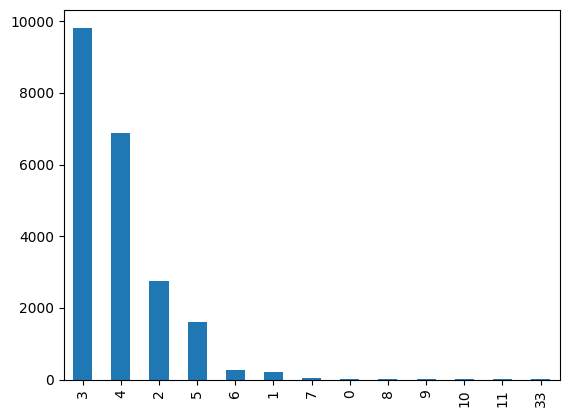

In [39]:
# Let's make a plot of the above Series
houses["bedrooms"].value_counts().plot(kind="bar") #kind of plot = bar graph; default = line

In [40]:
# From the titanic DataFrame, let's plot how many people lived vs how many died
titanic["survived"].value_counts()

# Meaning that 500 survived, and 809 died

0    809
1    500
Name: survived, dtype: int64

<Axes: ylabel='survived'>

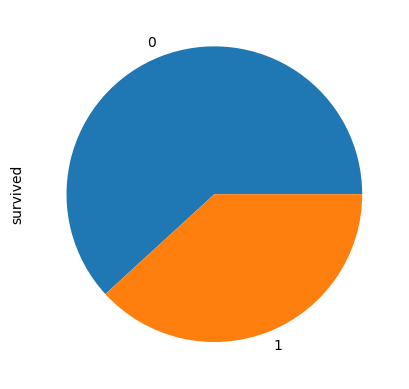

In [41]:
# Let's plot that
titanic["survived"].value_counts().plot(kind="pie") #kind of plot = pie chart ; default = line

In [42]:
# How about the gender representation for people onboard the Titanic?
titanic["sex"].value_counts()

# Meaning there more male than female passengers

male      843
female    466
Name: sex, dtype: int64

<Axes: ylabel='sex'>

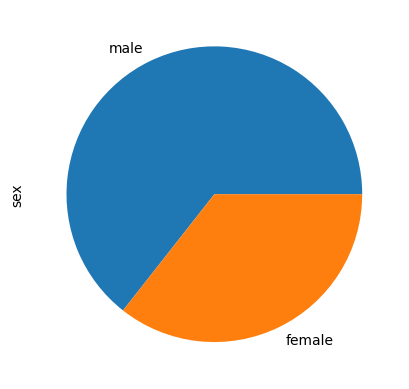

In [43]:
# Let's plot that
titanic["sex"].value_counts().plot(kind="pie")

In [44]:
# From the netflix_titles DataSet, let's see a general representation of top 10 ratings
netflix["rating"].unique() # The different ratings present:

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17'], dtype=object)

In [45]:
# Get top 10 ratings
netflix["rating"].value_counts().head(10)

TV-MA    2256
TV-14    1386
TV-PG     470
R         367
TV-Y      231
PG-13     226
TV-Y7     213
TV-G      144
PG        123
G          13
Name: rating, dtype: int64

<Axes: >

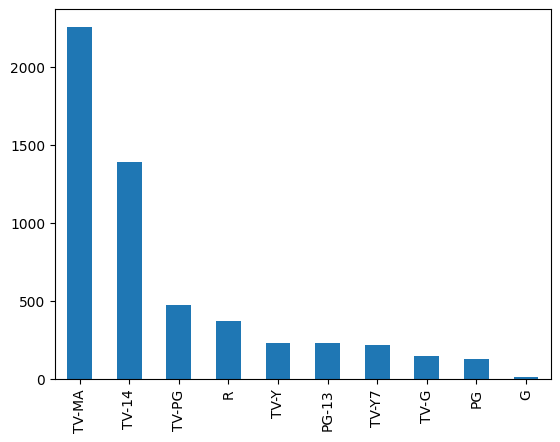

In [46]:
# Plot the series returned from the above line of code
netflix["rating"].value_counts().head(10).plot(kind="bar")

# `DataFrame.plot()`
* Makes `plot` of a `DataFrame`

In [47]:
# Let's plot the number of bathrooms vs bedrooms in the houses DataFrame
# First, we'll have to create a sub-set from the houses Dataframe, that only contains bedrooms & bathrooms like this:
bed_and_baths = houses[["bedrooms", "bathrooms"]]
bed_and_baths

,bedrooms,bathrooms
0,3,1.00
1,3,2.25
2,2,1.00
3,4,3.00
4,3,2.00
...,...,...
21608,3,2.50
21609,4,2.50
21610,2,0.75
21611,3,2.50


<Axes: xlabel='bedrooms', ylabel='bathrooms'>

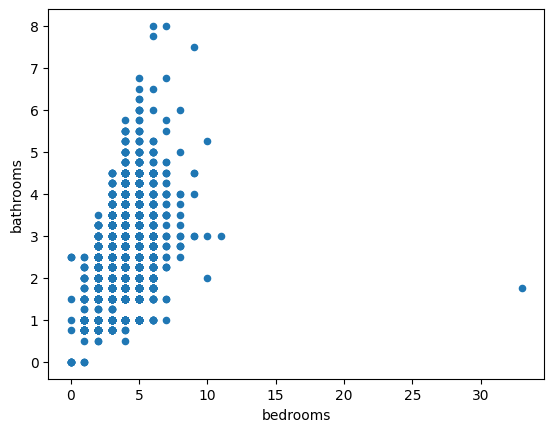

In [48]:
# Make a Scatter plot, with x axis = bedrooms & y axis = bathrooms
bed_and_baths.plot(y="bathrooms", x="bedrooms", kind="scatter")

# **Exercise Time!** 💪 💪 💪
---
**Work with the `bestsellers.csv` dataset to answer the following questions:**

### Part 1
* Retrieve a series that contains the book Names
* Retrieve a series that contains the User Ratings
* Retrieve the first 8 Authors

In [49]:
bestsellers.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [50]:
# Retrieve a series that contains the book Names
bestsellers["Name"]

0                          10-Day Green Smoothie Cleanse
1                                      11/22/63: A Novel
2                12 Rules for Life: An Antidote to Chaos
3                                 1984 (Signet Classics)
4      5,000 Awesome Facts (About Everything!) (Natio...
                             ...                        
545         Wrecking Ball (Diary of a Wimpy Kid Book 14)
546    You Are a Badass: How to Stop Doubting Your Gr...
547    You Are a Badass: How to Stop Doubting Your Gr...
548    You Are a Badass: How to Stop Doubting Your Gr...
549    You Are a Badass: How to Stop Doubting Your Gr...
Name: Name, Length: 550, dtype: object

In [51]:
# Retrieve a series that contains the User Ratings
bestsellers["User Rating"]

0      4.7
1      4.6
2      4.7
3      4.7
4      4.8
      ... 
545    4.9
546    4.7
547    4.7
548    4.7
549    4.7
Name: User Rating, Length: 550, dtype: float64

In [52]:
# Retrieve the first 8 Authors
bestsellers["Author"].head(8)

0                    JJ Smith
1                Stephen King
2          Jordan B. Peterson
3               George Orwell
4    National Geographic Kids
5         George R. R. Martin
6         George R. R. Martin
7                 Amor Towles
Name: Author, dtype: object

### Part 2
* Find the unique Genres
* Find the number of unique Authors
* Find the average Price
* Find the 10 highest prices

In [53]:
# Find the unique Genres
bestsellers["Genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [54]:
# Find the number of unique Authors
bestsellers["Author"].nunique()

248

In [56]:
# Find the average Price
bestsellers["Price"].mean()

13.1

In [57]:
# Find the 10 highest prices
bestsellers["Price"].nlargest(10)

69     105
70     105
473     82
151     54
346     53
159     52
271     46
272     46
273     46
274     46
Name: Price, dtype: int64

### Part 3
* Find the top 3 most common book titles in the dataset
* Create a new dataframe with only Author and User Rating
* Using the new dataframe, find the most common combination of Author and User Rating Score.

In [58]:
# Find the top 3 most common book titles in the dataset
# bestsellers["Name"].nunique()
bestsellers["Name"].value_counts().head(3)

Publication Manual of the American Psychological Association, 6th Edition    10
StrengthsFinder 2.0                                                           9
Oh, the Places You'll Go!                                                     8
Name: Name, dtype: int64

In [59]:
# Create a new dataframe with only Author and User Rating
author_n_rating = bestsellers[["Author", "User Rating"]]

In [60]:
# Using the new dataframe, find the most common combination of Author and User Rating Score.
author_n_rating.value_counts().head(2)

Author                              User Rating
Jeff Kinney                         4.8            10
American Psychological Association  4.5            10
dtype: int64

### Part 4
* Create a pie chart showing the total number of times each Genre appears in the dataset
* Find out the top 10 most prolific authors and plot their number of books as a bar plot
* BONUS: create a histogram showing the distribution of User Rating scores

<Axes: ylabel='Genre'>

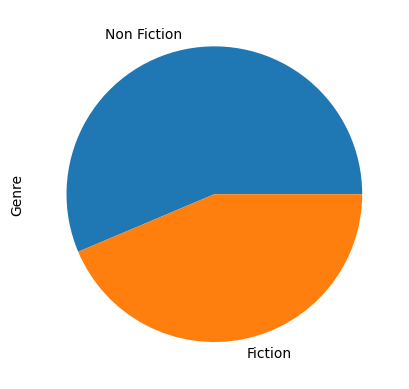

In [61]:
# Create a pie chart showing the total number of times each Genre appears in the dataset
bestsellers["Genre"].value_counts().plot(kind="pie")

In [62]:
# Find out the top 10 most prolific authors and plot their number of books as a bar plot
bestsellers["Author"].nunique()

248

In [63]:
bestsellers["Author"].value_counts().head(10)

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Stephenie Meyer                        7
Name: Author, dtype: int64

<Axes: >

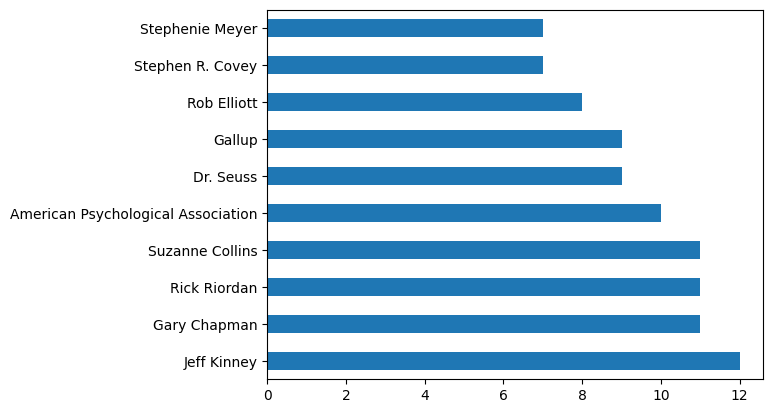

In [64]:
bestsellers["Author"].value_counts().head(10).plot(kind="barh")

<Axes: ylabel='Frequency'>

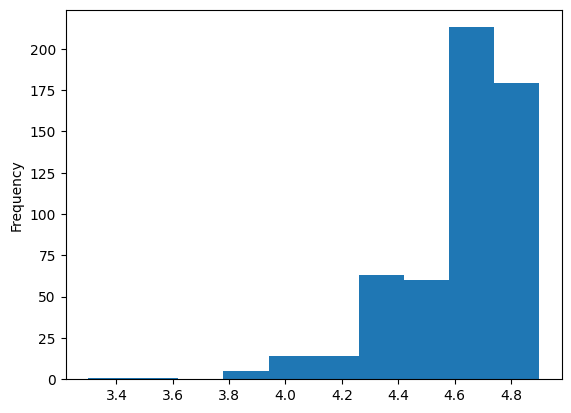

In [65]:
# BONUS: create a histogram showing the distribution of User Rating scores
bestsellers["User Rating"].plot(kind="hist")